# **Importing Modules and Libraries**

In [1]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import pickle 
from os import path

#1
# from Linear_Regression_implementation import LinearRegression1
from LinearRegression import LinearRegressionOVO
from LogisticRegression import LogisticRegression
from LogisticRegression_Multi import MultiClassLogisticRegression
from Naive_Bayes import NaiveBayes
from Naive_Bayes_Multi import NaiveBayesMulti
# from KNN import KNN
from KNN_version1 import KNNClassifier
from SVM import SVM
from SVM_multi import SVMMulti
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline


from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# **Importing Datasets**

In [2]:
data = pd.read_csv('/feiyu/kaggle/input/unsw-nb15/UNSW_NB15_testing-set.csv')

In [3]:
data.head(n=5)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [4]:
#第一行标题
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [5]:
#it filters the dataset to include only those rows where the 'service' column has a hyphen, 
#indicating missing or undefined service information.
data[data['service']=='-']

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
5,6,0.380537,tcp,-,FIN,10,6,534,268,39.417980,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175125,175126,0.653375,tcp,-,FIN,10,8,564,354,26.018748,...,1,1,0,0,0,18,1,0,Reconnaissance,1
175179,175180,0.695566,tcp,-,FIN,10,8,564,354,24.440528,...,1,1,0,0,0,3,1,0,Reconnaissance,1
175191,175192,0.962856,tcp,-,FIN,24,60,1256,59374,86.201883,...,1,1,0,0,0,1,1,0,Exploits,1
175277,175278,3.719110,tcp,-,FIN,66,340,3086,426483,108.897021,...,1,1,0,0,0,2,1,0,Exploits,1


In [6]:
data['service'].replace('-',np.nan,inplace=True)

In [7]:
data.isnull().sum()

id                       0
dur                      0
proto                    0
service              94168
state                    0
spkts                    0
dpkts                    0
sbytes                   0
dbytes                   0
rate                     0
sttl                     0
dttl                     0
sload                    0
dload                    0
sloss                    0
dloss                    0
sinpkt                   0
dinpkt                   0
sjit                     0
djit                     0
swin                     0
stcpb                    0
dtcpb                    0
dwin                     0
tcprtt                   0
synack                   0
ackdat                   0
smean                    0
dmean                    0
trans_depth              0
response_body_len        0
ct_srv_src               0
ct_state_ttl             0
ct_dst_ltm               0
ct_src_dport_ltm         0
ct_dst_sport_ltm         0
ct_dst_src_ltm           0
i

In [8]:
data.shape

(175341, 45)

In [9]:
# data.dropna(inplace=True)

In [10]:
# the DataFrame has 175341 rows and 45 columns.
data.shape

(175341, 45)

In [11]:
data['attack_cat'].value_counts()

attack_cat
Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: count, dtype: int64

In [12]:
data['state'].value_counts()

state
INT    82275
FIN    77825
CON    13152
REQ     1991
RST       83
ECO       12
PAR        1
URN        1
no         1
Name: count, dtype: int64

In [13]:
data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,NaN,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,NaN,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,NaN,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,NaN,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175337,175338,0.505762,tcp,NaN,FIN,10,8,620,354,33.612649,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


In [14]:
features = pd.read_csv('/feiyu/kaggle/input/unsw-nb15/UNSW-NB15_features.csv')

In [15]:
features.head()

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol


In [16]:
features['Type '] = features['Type '].str.lower()

In [17]:
# selecting column names of all data types
nominal_names = features['Name'][features['Type ']=='nominal']
integer_names = features['Name'][features['Type ']=='integer']
binary_names = features['Name'][features['Type ']=='binary']
float_names = features['Name'][features['Type ']=='float']

In [18]:
# selecting common column names from dataset and feature dataset
cols = data.columns
nominal_names = cols.intersection(nominal_names)
integer_names = cols.intersection(integer_names)
binary_names = cols.intersection(binary_names)
float_names = cols.intersection(float_names)

In [19]:
# Converting integer columns to numeric
for c in integer_names:
  data[c] = pd.to_numeric(data[c])

In [20]:
# Converting binary columns to numeric
for c in binary_names:
  data[c] = pd.to_numeric(data[c])

In [21]:
# Converting float columns to numeric
for c in float_names:
  data[c] = pd.to_numeric(data[c])

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            81173 non-null   object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [23]:
data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,NaN,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,NaN,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,NaN,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,NaN,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175337,175338,0.505762,tcp,NaN,FIN,10,8,620,354,33.612649,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


# **Data Visualization**

## **Binary Classification**

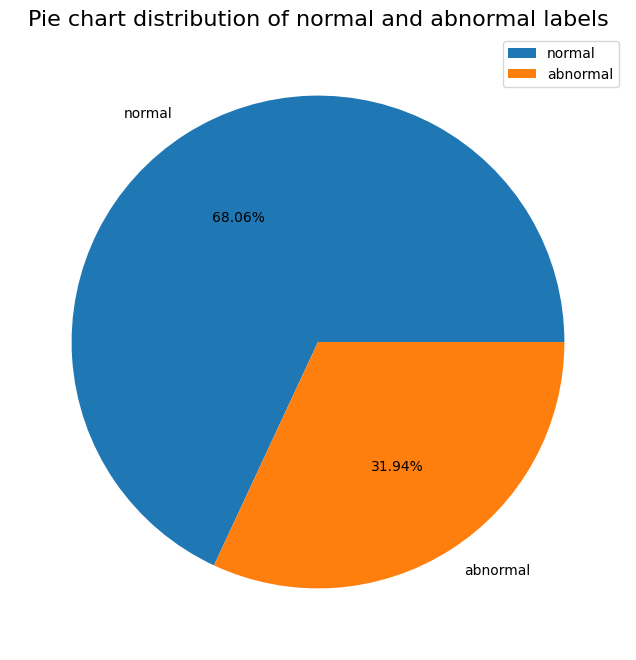

In [24]:
plt.figure(figsize=(8,8))
plt.pie(data.label.value_counts(),labels=['normal','abnormal'],autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels",fontsize=16)
plt.legend()
plt.show()

## **Multi-class Classification**

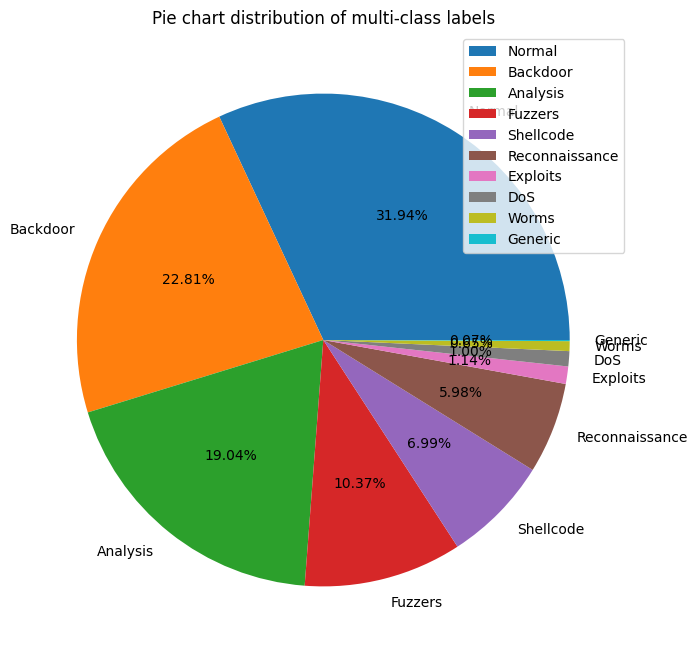

In [25]:
plt.figure(figsize=(8,8))
plt.pie(data.attack_cat.value_counts(),labels=data.attack_cat.unique(),autopct='%0.2f%%')
plt.title('Pie chart distribution of multi-class labels')
plt.legend(loc='best')
plt.show()

# **One hot encoding**

In [26]:
# One-hot encoding is a method used to convert categorical data into a format that can be more easily utilized by machine learning algorithms. 
# In here, it is used to convert proto, service, state these three categorical data to binary variables for machine learning better utilized

num_col = data.select_dtypes(include='number').columns

# selecting categorical data attributes
cat_col = data.columns.difference(num_col) #This line finds all columns in data that are not in num_col, essentially selecting columns that are categorical or non-numeric.
cat_col = cat_col[1:]
cat_col

Index(['proto', 'service', 'state'], dtype='object')

In [27]:
# creating a dataframe with only categorical attributes
data_cat = data[cat_col].copy()
data_cat.head()

,proto,service,state
0,tcp,NaN,FIN
1,tcp,NaN,FIN
2,tcp,NaN,FIN
3,tcp,ftp,FIN
4,tcp,NaN,FIN


In [28]:
# one-hot-encoding categorical attributes using pandas.get_dummies() function
# This line applies one-hot encoding to the categorical columns in data_cat. pd.get_dummies() creates binary (dummy) variables for each category in the categorical columns
data_cat = pd.get_dummies(data_cat,columns=cat_col)

In [29]:
data_cat

,proto_3pc,proto_a/n,proto_aes-sp3-d,proto_any,proto_argus,proto_aris,proto_arp,proto_ax.25,proto_bbn-rcc,proto_bna,...,service_ssl,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
175337,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
175338,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
175339,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [30]:
data.shape

(175341, 45)

In [31]:
#Concatenating Encoded Data Back to Original DataFrame
data = pd.concat([data, data_cat],axis=1)

In [32]:
data.shape

(175341, 199)

In [33]:
data.drop(columns=cat_col,inplace=True)

In [34]:
data.shape

(175341, 196)

# **Data Normalization**


In [35]:
#Normalization is a scaling technique in data preprocessing where the values of numeric columns in the dataset are transformed to be on a similar scale.

# selecting numeric attributes columns from data
num_col = list(data.select_dtypes(include='number').columns)
num_col.remove('id')
num_col.remove('label')
print(num_col)

['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports']


In [36]:
# using minmax scaler for normalizing data
minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return df

In [37]:
# data before normalization
data.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,service_ssl,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,1,0.121478,6,4,258,172,74.087490,252,254,14158.942380,...,False,False,False,True,False,False,False,False,False,False
1,2,0.649902,14,38,734,42014,78.473372,62,252,8395.112305,...,False,False,False,True,False,False,False,False,False,False
2,3,1.623129,8,16,364,13186,14.170161,62,252,1572.271851,...,False,False,False,True,False,False,False,False,False,False
3,4,1.681642,12,12,628,770,13.677108,62,252,2740.178955,...,False,False,False,True,False,False,False,False,False,False
4,5,0.449454,10,6,534,268,33.373826,254,252,8561.499023,...,False,False,False,True,False,False,False,False,False,False


In [38]:
# calling normalization() function
data = normalization(data.copy(),num_col)

In [39]:
# data after normalization
data.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,service_ssl,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,1,0.002025,0.000520,0.000364,0.000018,0.000012,0.000074,0.988235,1.000000,2.364553e-06,...,False,False,False,True,False,False,False,False,False,False
1,2,0.010832,0.001352,0.003463,0.000054,0.002867,0.000078,0.243137,0.992126,1.401989e-06,...,False,False,False,True,False,False,False,False,False,False
2,3,0.027052,0.000728,0.001458,0.000026,0.000900,0.000014,0.243137,0.992126,2.625704e-07,...,False,False,False,True,False,False,False,False,False,False
3,4,0.028027,0.001144,0.001093,0.000046,0.000053,0.000014,0.243137,0.992126,4.576117e-07,...,False,False,False,True,False,False,False,False,False,False
4,5,0.007491,0.000936,0.000547,0.000039,0.000018,0.000033,0.996078,0.992126,1.429776e-06,...,False,False,False,True,False,False,False,False,False,False


# **Label Encoding**

## **Binary Labels**

In [40]:
# changing attack labels into two categories 'normal' and 'abnormal'
bin_label = pd.DataFrame(data.label.map(lambda x:'normal' if x==0 else 'abnormal'))

In [41]:
# creating a dataframe with binary labels (normal,abnormal)
bin_data = data.copy()
bin_data['label'] = bin_label

In [42]:
# label encoding (0,1) binary labels
le1 = preprocessing.LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)
bin_data['label'] = enc_label

In [43]:
le1.classes_

array(['abnormal', 'normal'], dtype=object)

In [44]:
np.save("le1_classes.npy",le1.classes_,allow_pickle=True)

## **Multi-class Labels**

In [45]:
# one-hot-encoding attack label
multi_data = data.copy()
multi_label = pd.DataFrame(multi_data.attack_cat)

In [46]:
multi_data = pd.get_dummies(multi_data,columns=['attack_cat'])

In [47]:
# label encoding (0,1,2,3,4,5,6,7,8) multi-class labels
le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_data['label'] = enc_label

In [48]:
le2.classes_

array(['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic',
       'Normal', 'Reconnaissance', 'Shellcode', 'Worms'], dtype=object)

In [49]:
np.save("le2_classes.npy",le2.classes_,allow_pickle=True)

# **Correlation between features of dataset**

In [50]:
num_col.append('label')

## **Correlation Matrix for Binary Labels**

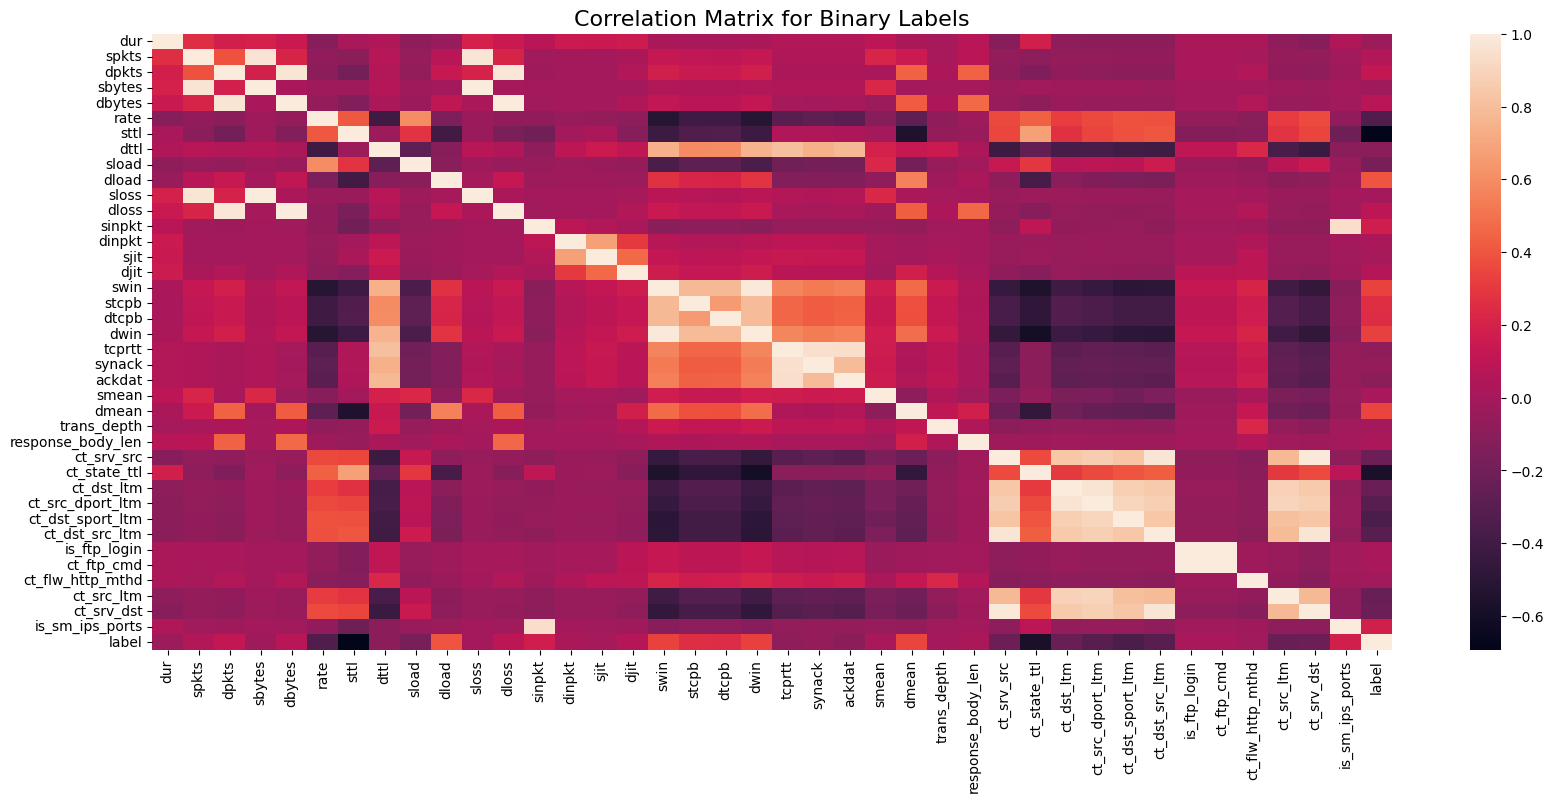

In [51]:
# Correlation Matrix for Binary Labels
plt.figure(figsize=(20,8))
corr_bin = bin_data[num_col].corr()
sns.heatmap(corr_bin,vmax=1.0,annot=False)
plt.title('Correlation Matrix for Binary Labels',fontsize=16)
plt.show()

## **Correlation Matrix for Multi-class Labels**

In [52]:
num_col = list(multi_data.select_dtypes(include='number').columns)

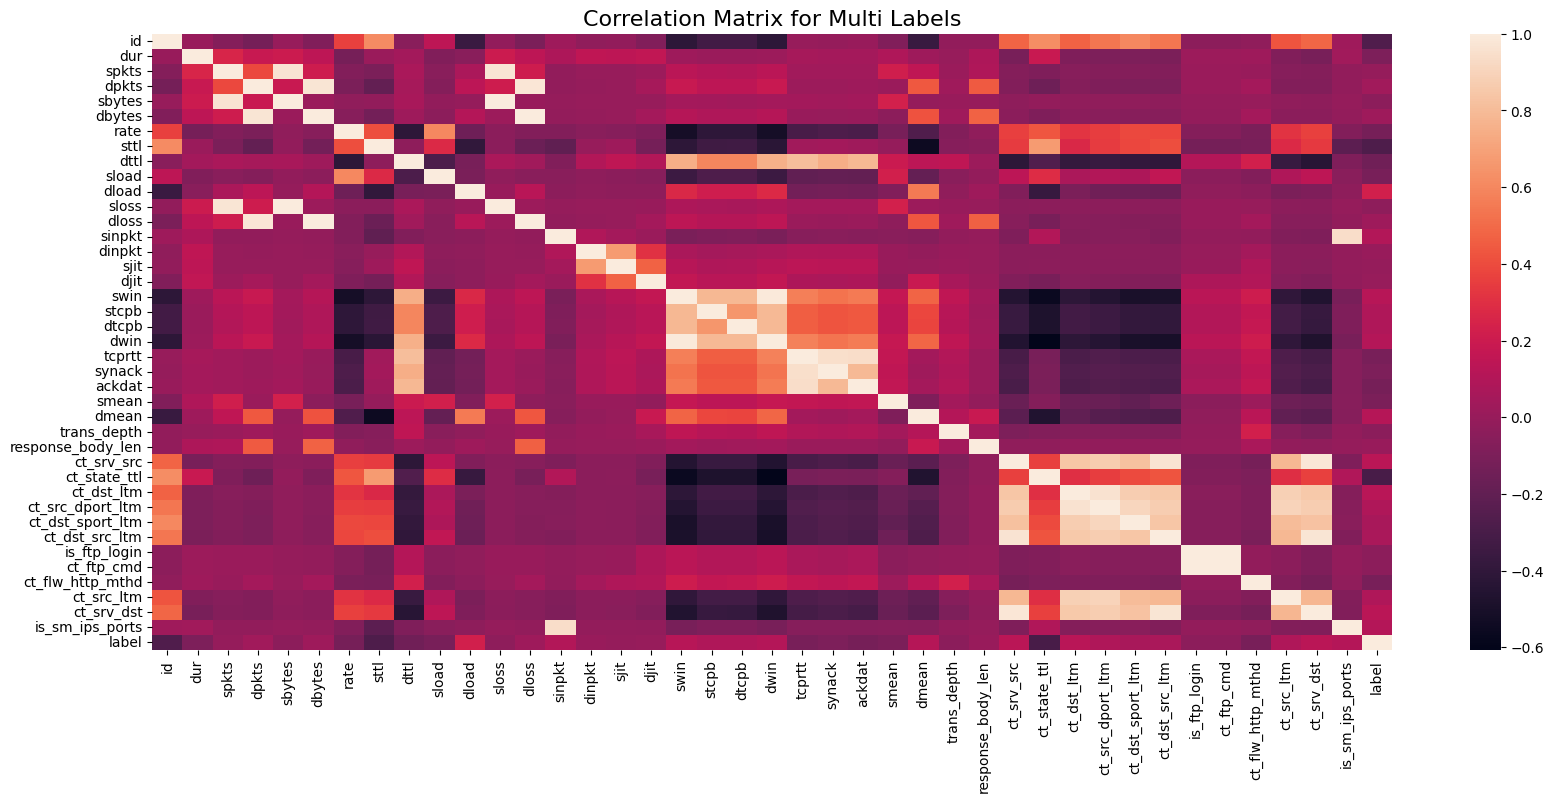

In [53]:
# Correlation Matrix for Multi-class Labels
plt.figure(figsize=(20,8))
corr_multi = multi_data[num_col].corr()
sns.heatmap(corr_multi,vmax=1.0,annot=False)
plt.title('Correlation Matrix for Multi Labels',fontsize=16)
plt.show()

# **Feature Selection**

for reducing overfitting: reduce filter method, for filter out the correlation rare less than 0.3

## **Binary Labels**

In [54]:
# finding the attributes which have more than 0.3 correlation with encoded attack label attribute 
corr_ybin = abs(corr_bin['label'])
highest_corr_bin = corr_ybin[corr_ybin >0.3]
highest_corr_bin.sort_values(ascending=True)

ct_dst_src_ltm      0.303855
ct_src_dport_ltm    0.305579
dwin                0.319626
swin                0.333633
rate                0.337979
dmean               0.341806
ct_dst_sport_ltm    0.357213
dload               0.393739
ct_state_ttl        0.577704
sttl                0.692741
label               1.000000
Name: label, dtype: float64

In [55]:
# selecting attributes found by using pearson correlation coefficient
bin_cols = highest_corr_bin.index
bin_cols

Index(['rate', 'sttl', 'dload', 'swin', 'dwin', 'dmean', 'ct_state_ttl',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'label'],
      dtype='object')

In [56]:
# Binary labelled Dataset
bin_data = bin_data[bin_cols].copy()
bin_data

,rate,sttl,dload,swin,dwin,dmean,ct_state_ttl,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,label
0,0.000074,0.988235,0.000379,1.0,1.0,0.029492,0.000000,0.00,0.000000,0.000000,1
1,0.000078,0.243137,0.022458,1.0,1.0,0.758573,0.166667,0.00,0.000000,0.015625,1
2,0.000014,0.243137,0.002717,1.0,1.0,0.565158,0.166667,0.00,0.000000,0.031250,1
3,0.000014,0.243137,0.000150,1.0,1.0,0.043896,0.166667,0.00,0.000000,0.031250,1
4,0.000033,0.996078,0.000178,1.0,1.0,0.030864,0.166667,0.02,0.000000,0.609375,1
...,...,...,...,...,...,...,...,...,...,...,...
175336,0.111111,0.996078,0.000000,0.0,0.0,0.000000,0.333333,0.46,0.266667,0.359375,0
175337,0.000034,0.996078,0.000219,1.0,1.0,0.030178,0.166667,0.00,0.000000,0.015625,0
175338,0.111111,0.996078,0.000000,0.0,0.0,0.000000,0.333333,0.04,0.044444,0.187500,0
175339,0.111111,0.996078,0.000000,0.0,0.0,0.000000,0.333333,0.58,0.288889,0.453125,0


## **Multi-class Labels**

In [57]:
# finding the attributes which have more than 0.3 correlation with encoded attack label attribute 
corr_ymulti = abs(corr_multi['label'])
highest_corr_multi = corr_ymulti[corr_ymulti >0.3]
highest_corr_multi.sort_values(ascending=True)

ct_state_ttl    0.302136
label           1.000000
Name: label, dtype: float64

In [58]:
# selecting attributes found by using pearson correlation coefficient
multi_cols = highest_corr_multi.index
multi_cols

Index(['ct_state_ttl', 'label'], dtype='object')

In [59]:
# Multi-class labelled Dataset
multi_data = multi_data[multi_cols].copy()
multi_data

,ct_state_ttl,label
0,0.000000,6
1,0.166667,6
2,0.166667,6
3,0.166667,6
4,0.166667,6
...,...,...
175336,0.333333,5
175337,0.166667,8
175338,0.333333,5
175339,0.333333,5


# **Naive Bayes Binary**

In [60]:
# Separate features and target
X = bin_data.drop('label', axis=1)
y = bin_data['label']

In [61]:
# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [63]:
model_nb = NaiveBayes()

In [64]:
model_nb.fit(X_train,y_train)

In [65]:
y_pred = model_nb.predict(X_test)

/feiyu/Naive_Bayes.py:32: RuntimeWarning: divide by zero encountered in log
  posterior = np.sum(np.log(self._pdf(idx, x)))


In [66]:
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

# Print True Positives and False Positives
print("True Positives (TP):", TP)
print("False Positives (FP):", FP)
print("True Negatives (TN):", TN)
print("False Negatives (FN):", FN)
print()
detection_rate = TP / (TP + FN)
false_positive_rate = FP / (FP + TN)
recall_rate = TP/(TP+FN)
# Print the results
print("Detection Rate (True Positive Rate):", detection_rate)
print("False Positive Rate:", false_positive_rate)

True Positives (TP): 8866
False Positives (FP): 3409
True Negatives (TN): 20491
False Negatives (FN): 2303

Detection Rate (True Positive Rate): 0.7938042797027487
False Positive Rate: 0.14263598326359833


In [67]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.16287889589095783
Mean Squared Error -  0.16287889589095783
Root Mean Squared Error -  0.4035825762975377
R2 Score -  25.41711124372562
Accuracy -  83.71211041090422


In [68]:
cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)

In [69]:
print(cls_report)

              precision    recall  f1-score   support

    abnormal       0.90      0.86      0.88     23900
      normal       0.72      0.79      0.76     11169

    accuracy                           0.84     35069
   macro avg       0.81      0.83      0.82     35069
weighted avg       0.84      0.84      0.84     35069



In [70]:
lr_bin_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
lr_bin_df

,Actual,Predicted
15482,1,1
133349,0,0
80485,0,0
29972,1,1
18339,1,1
...,...,...
94427,0,0
2244,1,1
17130,1,1
14327,1,1


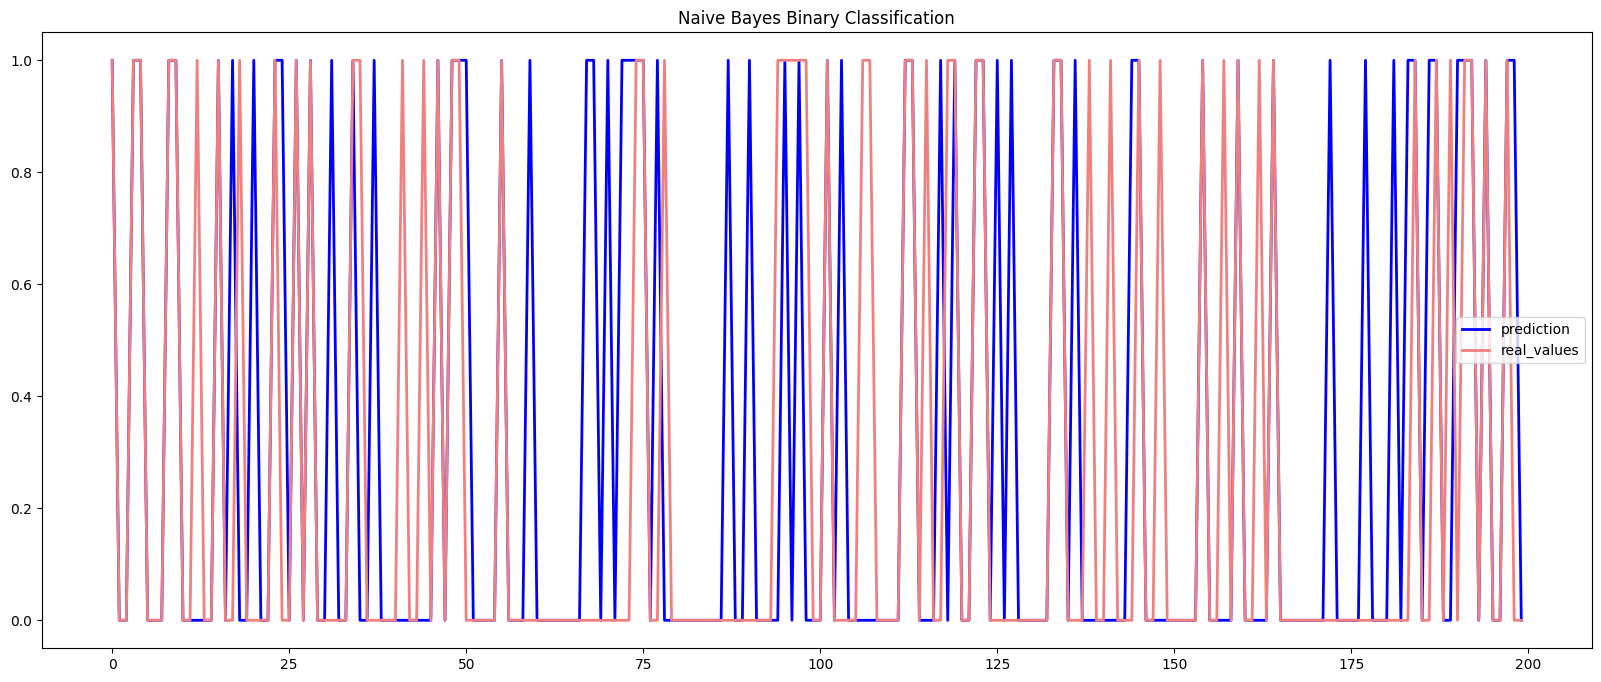

In [71]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("Naive Bayes Binary Classification")
plt.show()

# **Naive Bayes Multi**

In [72]:
X = multi_data.drop(columns=['label'],axis=1)
y = multi_data['label']

In [73]:
# Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
model_nb_multi = NaiveBayesMulti()

In [75]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model_nb_multi.fit(X_train, y_train)

In [76]:
y_pred = model_nb_multi.predict(X_test)

In [77]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Initialize variables
total_TP = 0
total_FP = 0
total_TN = 0
total_FN = 0

# Calculate totals for each class
for i in range(len(le2.classes_)):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (FP + FN + TP)

    # Update the totals
    total_TP += TP
    total_FP += FP
    total_FN += FN
    total_TN += TN

# Calculate the overall metrics
general_TPR = total_TP / (total_TP + total_FN)  # True Positive Rate
general_FPR = total_FP / (total_FP + total_TN)  # False Positive Rate

print(f"General True Positive Rate: {general_TPR}\nGeneral False Positive Rate: {general_FPR}")

General True Positive Rate: 0.5765205737260829
General False Positive Rate: 0.04705326958599079


In [78]:
print("Accuracy:", accuracy_score(y_test, y_pred)*100)

Accuracy: 57.65205737260829


In [79]:
cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le2.classes_)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [80]:
print(cls_report)

                precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00       393
      Backdoor       0.00      0.00      0.00       360
           DoS       0.00      0.00      0.00      2370
      Exploits       0.40      0.59      0.48      6772
       Fuzzers       0.00      0.00      0.00      3570
       Generic       0.48      0.99      0.65      8079
        Normal       0.95      0.74      0.83     11169
Reconnaissance       0.00      0.00      0.00      2098
     Shellcode       0.00      0.00      0.00       233
         Worms       0.00      0.00      0.00        25

      accuracy                           0.58     35069
     macro avg       0.18      0.23      0.20     35069
  weighted avg       0.49      0.58      0.51     35069



In [81]:
lr_bin_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
lr_bin_df

,Actual,Predicted
15482,6,6
133349,5,5
80485,3,3
29972,6,6
18339,6,6
...,...,...
94427,2,5
2244,6,6
17130,6,6
14327,6,6


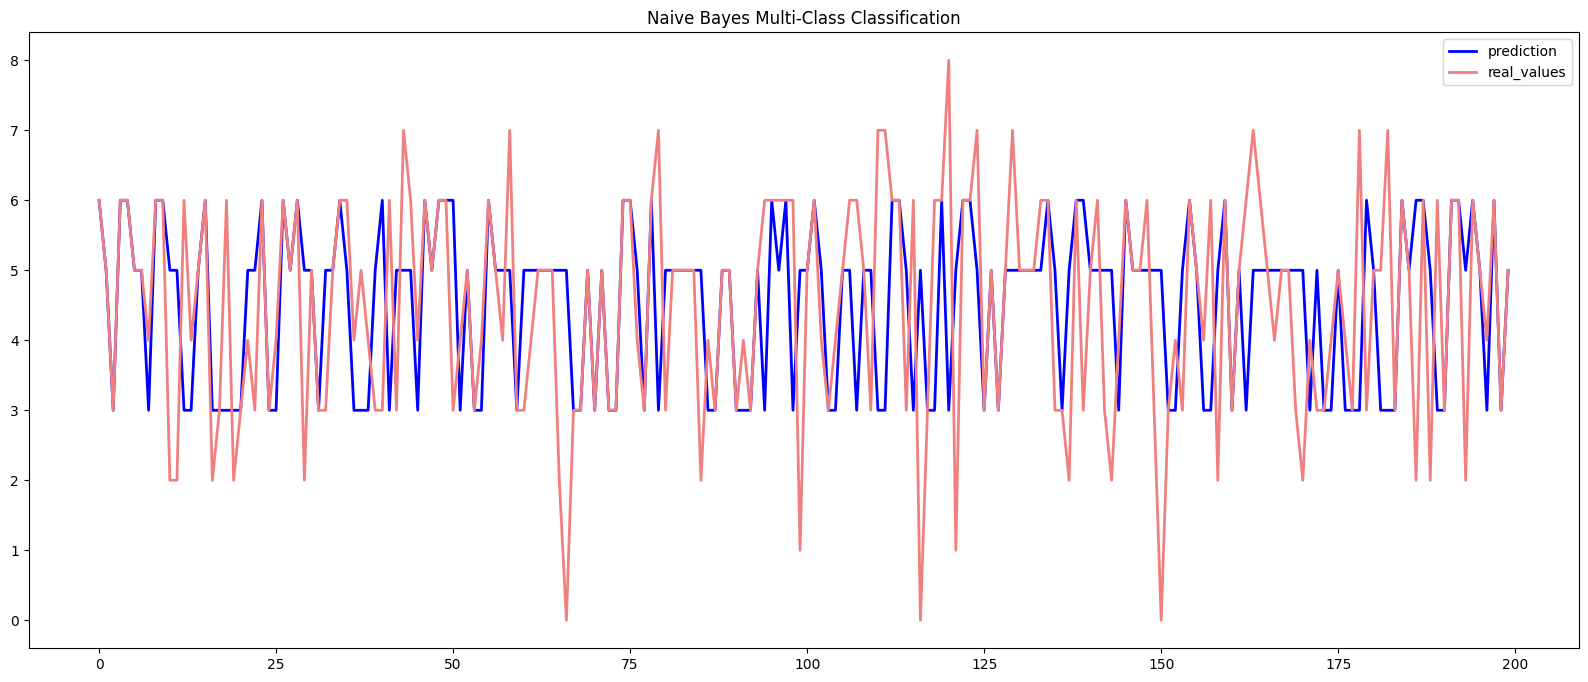

In [82]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("Naive Bayes Multi-Class Classification")
plt.show()

# **Logistic Regression Binary**

In [83]:
# Separate features and target
X = bin_data.drop('label', axis=1)
y = bin_data['label']

In [84]:
# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [86]:
# Instantiate the LogisticRegression
model = LogisticRegression()

In [87]:
# Fit the model to the training data
model.fit(X_train, y_train)

In [88]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [89]:
round = lambda x:1 if x>0.6 else 0
vfunc = np.vectorize(round)
y_pred = vfunc(y_pred)

In [90]:
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

# Print True Positives and False Positives
print("True Positives (TP):", TP)
print("False Positives (FP):", FP)
print("True Negatives (TN):", TN)
print("False Negatives (FN):", FN)
print()
detection_rate = TP / (TP + FN)
false_positive_rate = FP / (FP + TN)
recall_rate = TP/(TP+FN)
# Print the results
print("Detection Rate (True Positive Rate):", detection_rate)
print("False Positive Rate:", false_positive_rate)

True Positives (TP): 9317
False Positives (FP): 6801
True Negatives (TN): 17099
False Negatives (FN): 1852

Detection Rate (True Positive Rate): 0.8341839018712508
False Positive Rate: 0.28456066945606695


In [91]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.24674213693005217
Mean Squared Error -  0.24674213693005217
Root Mean Squared Error -  0.4967314535340521
R2 Score -  -4.503033088820607
Accuracy -  75.32578630699479


In [92]:
cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)

In [93]:
print(cls_report)

              precision    recall  f1-score   support

    abnormal       0.90      0.72      0.80     23900
      normal       0.58      0.83      0.68     11169

    accuracy                           0.75     35069
   macro avg       0.74      0.77      0.74     35069
weighted avg       0.80      0.75      0.76     35069



In [94]:
lr_bin_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
lr_bin_df

,Actual,Predicted
15482,1,1
133349,0,0
80485,0,1
29972,1,1
18339,1,1
...,...,...
94427,0,0
2244,1,1
17130,1,1
14327,1,1


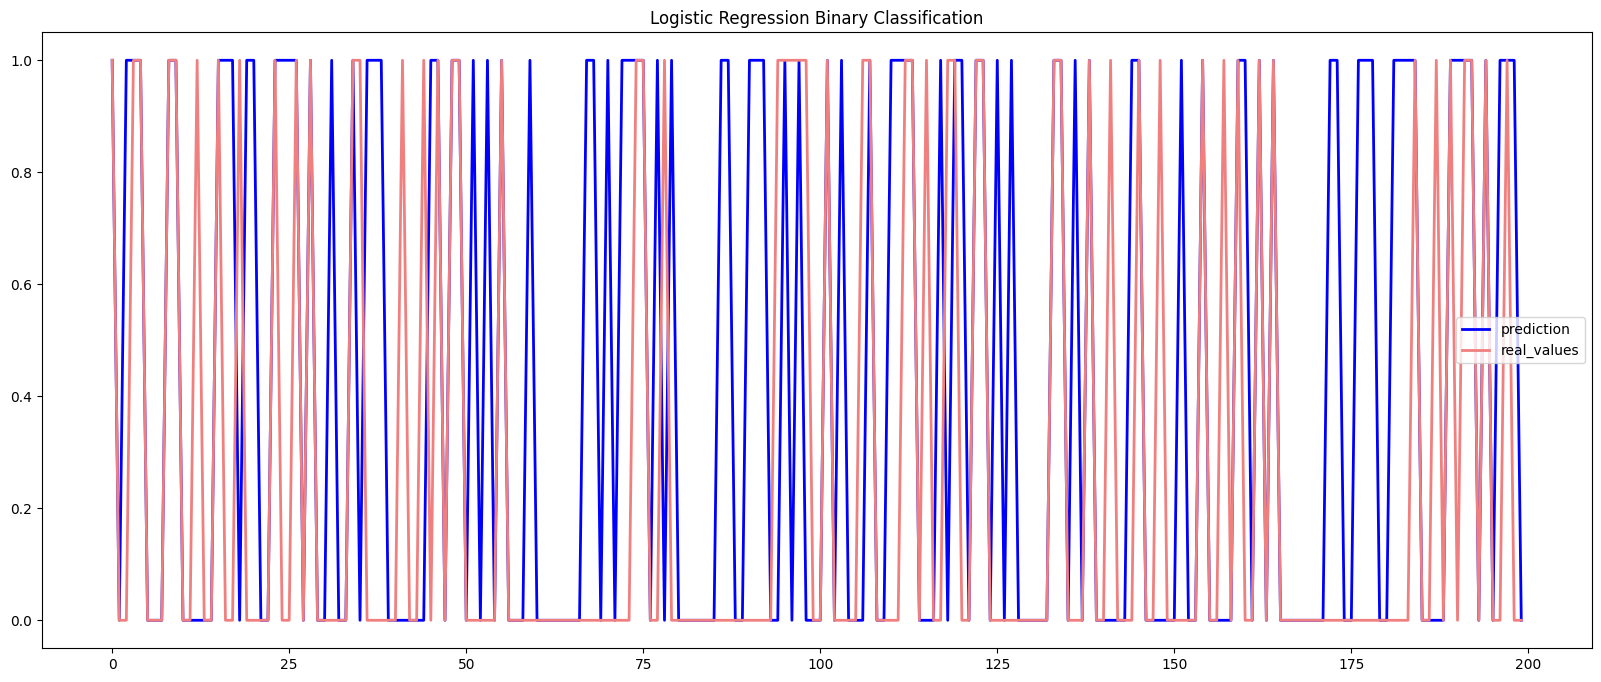

In [95]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("Logistic Regression Binary Classification")
plt.show()

# **Logistic Regression Multi**

In [96]:
X = multi_data.drop(columns=['label'],axis=1)
y = multi_data['label']

In [97]:
# Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=84)

In [98]:
model  = MultiClassLogisticRegression()

In [99]:
model.fit(X_train, y_train)

0.5016783718163894


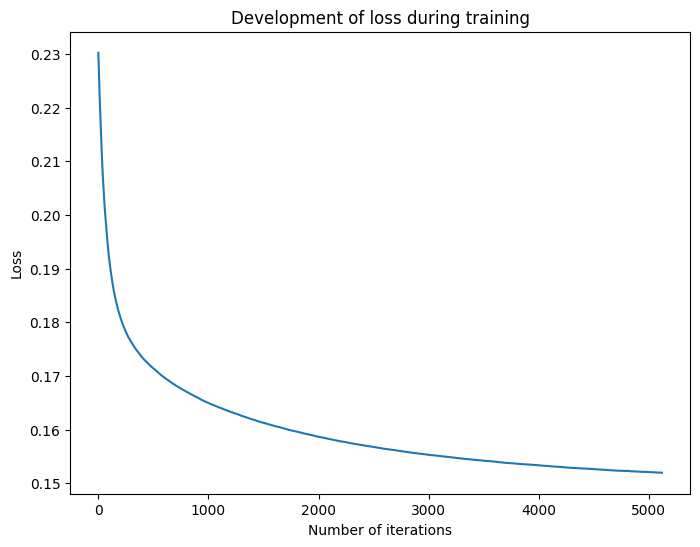

In [ ]:
pre = model.predict_classes(X_train)
print(model.score(X_train, y_train))

fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(len(model.loss)), model.loss)
plt.title("Development of loss during training")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
class_pred = np.argmax(y_pred, axis=1)

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, class_pred)

# Initialize variables
total_TP = 0
total_FP = 0
total_TN = 0
total_FN = 0

# Calculate totals for each class
for i in range(len(le2.classes_)):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (FP + FN + TP)

    # Update the totals
    total_TP += TP
    total_FP += FP
    total_FN += FN
    total_TN += TN

# Calculate the overall metrics
general_TPR = total_TP / (total_TP + total_FN)  # True Positive Rate
general_FPR = total_FP / (total_FP + total_TN)  # False Positive Rate

print(f"General True Positive Rate: {general_TPR}\nGeneral False Positive Rate: {general_FPR}")

General True Positive Rate: 0.5044579206509134
General False Positive Rate: 0.0550602310387874


In [ ]:
print("Accuracy:", accuracy_score(y_test, class_pred)*100)

Accuracy: 50.44579206509135


In [ ]:
cls_report= classification_report(y_test, class_pred,target_names=le2.classes_)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(cls_report)

                precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00       613
      Backdoor       0.00      0.00      0.00       511
           DoS       0.00      0.00      0.00      3623
      Exploits       0.00      0.00      0.00     10007
       Fuzzers       0.00      0.00      0.00      5396
       Generic       0.46      0.99      0.63     12015
        Normal       0.54      0.87      0.67     16944
Reconnaissance       0.00      0.00      0.00      3107
     Shellcode       0.00      0.00      0.00       352
         Worms       0.00      0.00      0.00        35

      accuracy                           0.50     52603
     macro avg       0.10      0.19      0.13     52603
  weighted avg       0.28      0.50      0.36     52603



In [ ]:
lr_multi_df = pd.DataFrame({'Actual': y_test, 'Predicted': class_pred})
lr_multi_df

,Actual,Predicted
124647,5,5
12422,6,6
13742,6,6
80915,3,5
99956,7,5
...,...,...
129297,5,5
166371,5,5
153441,4,6
8565,6,6


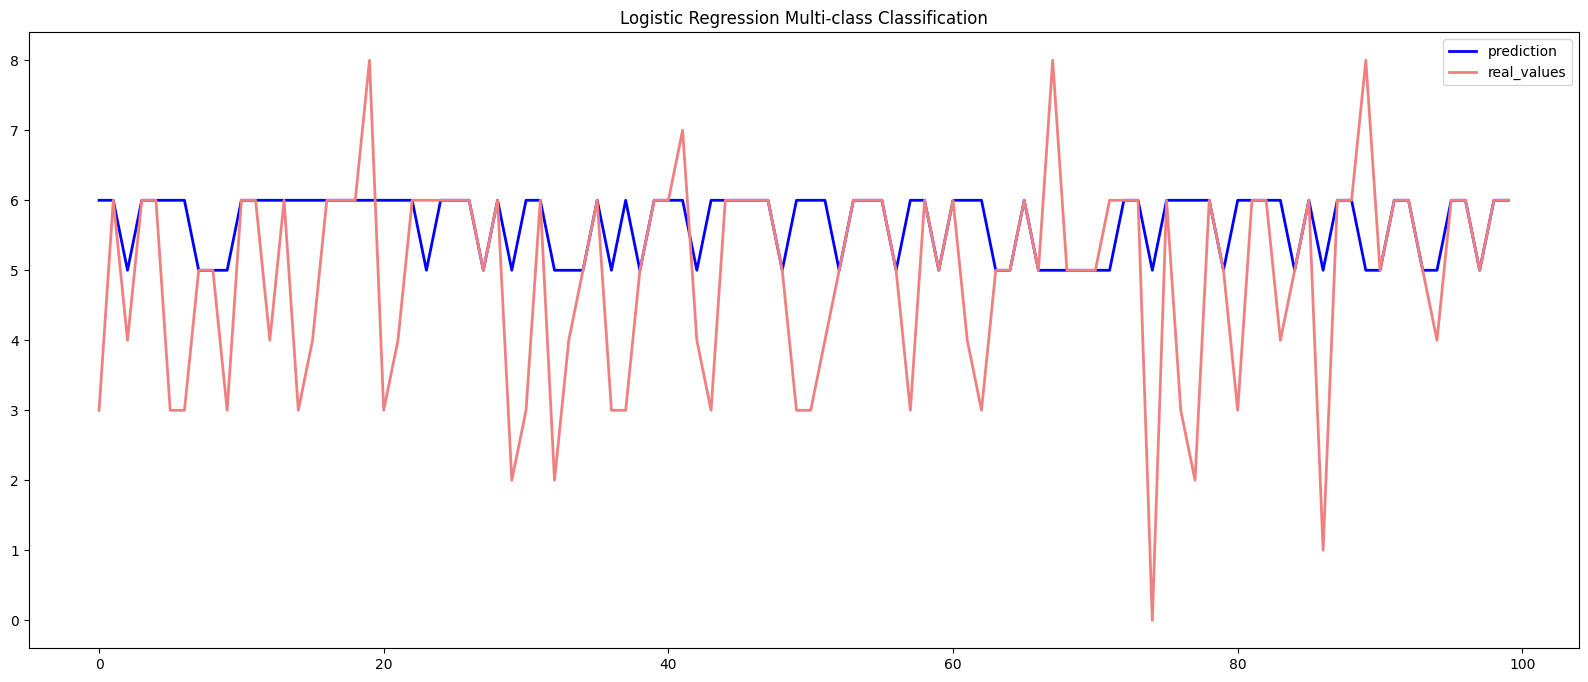

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(class_pred[100:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[100:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("Logistic Regression Multi-class Classification")
plt.show()

# **SVM binary**

In [201]:
# Separate features and target
X = bin_data.drop('label', axis=1)
y = bin_data['label']

# Encode the target variable y to -1 and 1
y = np.where(y == 0, -1, 1)

In [202]:
# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [203]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [204]:
model_SVM = SVM()
model_SVM.fit(X_train_scaled,y_train)

In [205]:
y_pred = model_SVM.predict(X_test_scaled)

In [206]:
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

# Print True Positives and False Positives
print("True Positives (TP):", TP)
print("False Positives (FP):", FP)
print("True Negatives (TN):", TN)
print("False Negatives (FN):", FN)
print()
detection_rate = TP / (TP + FN)
false_positive_rate = FP / (FP + TN)
recall_rate = TP/(TP+FN)
# Print the results
print("Detection Rate (True Positive Rate):", detection_rate)
print("False Positive Rate:", false_positive_rate)

True Positives (TP): 8524
False Positives (FP): 2015
True Negatives (TN): 21885
False Negatives (FN): 2645

Detection Rate (True Positive Rate): 0.7631838123377205
False Positive Rate: 0.08430962343096235


In [207]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.2657617839117169
Mean Squared Error -  0.5315235678234338
Root Mean Squared Error -  0.7290566286808137
R2 Score -  38.92815252617544
Accuracy -  86.71191080441415


In [208]:
cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)
print(cls_report)

              precision    recall  f1-score   support

    abnormal       0.89      0.92      0.90     23900
      normal       0.81      0.76      0.79     11169

    accuracy                           0.87     35069
   macro avg       0.85      0.84      0.84     35069
weighted avg       0.87      0.87      0.87     35069



In [209]:
lsvm_bin_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Transform back to 'normal' and 'abnormal'
lsvm_bin_df['Actual'] = np.where(lsvm_bin_df['Actual'] == -1, 0, 1)
lsvm_bin_df['Predicted'] = np.where(lsvm_bin_df['Predicted'] == -1.0, 0, 1)

# Display the transformed DataFrame
print(lsvm_bin_df)

       Actual  Predicted
0           1          1
1           0          0
2           0          0
3           1          1
4           1          1
...       ...        ...
35064       0          0
35065       1          1
35066       1          1
35067       1          1
35068       0          0

[35069 rows x 2 columns]


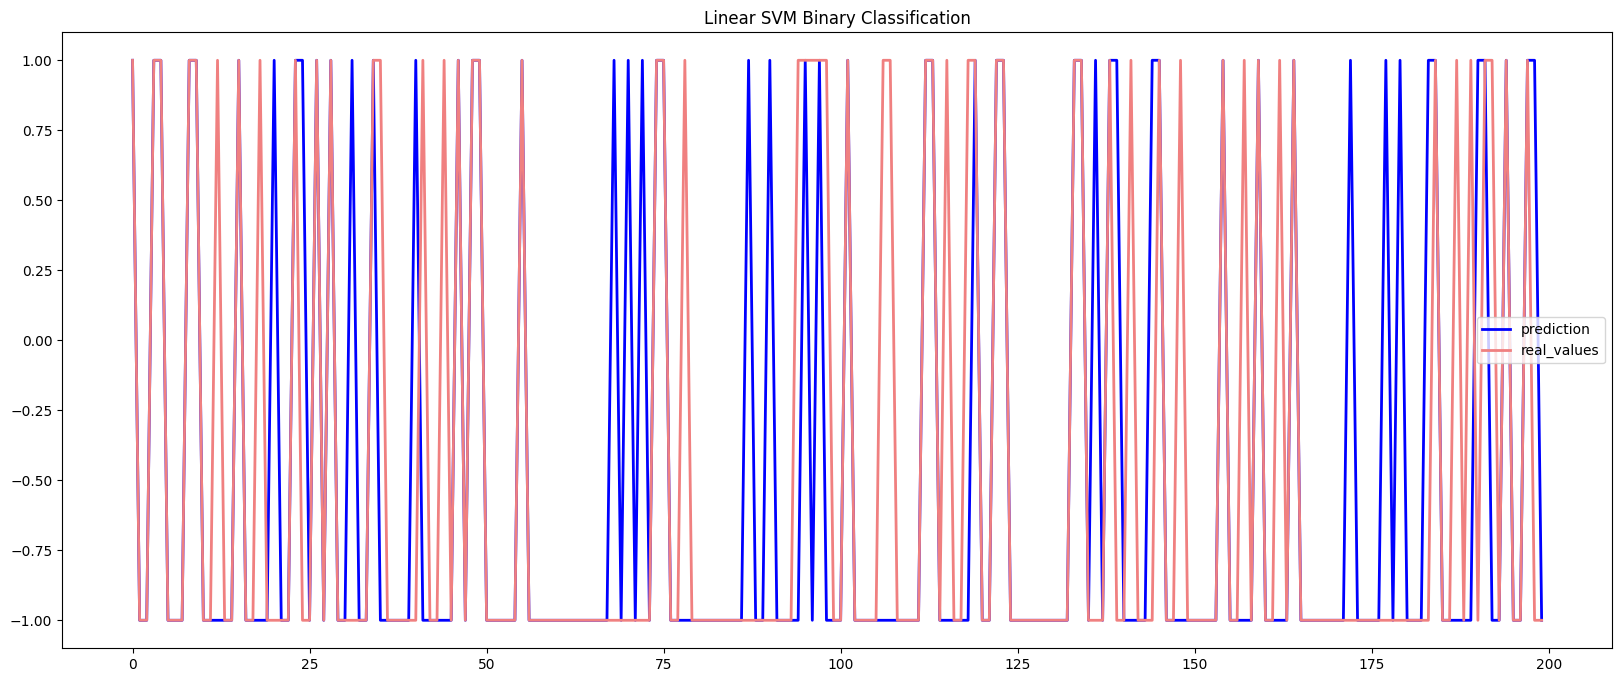

In [210]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200], label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("Linear SVM Binary Classification")
plt.show()

# **SVM Multi**

In [211]:
X = multi_data.drop(columns=['label'],axis=1)
y = multi_data['label']

In [212]:
# Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=84)

In [213]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [214]:
model_SVMMulti = SVMMulti()
model_SVMMulti.fit(X_train_scaled,y_train)

In [215]:
y_pred = model_SVMMulti.predict(X_test_scaled)

In [216]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Initialize variables
total_TP = 0
total_FP = 0
total_TN = 0
total_FN = 0

# Calculate totals for each class
for i in range(len(le2.classes_)):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (FP + FN + TP)

    # Update the totals
    total_TP += TP
    total_FP += FP
    total_FN += FN
    total_TN += TN

# Calculate the overall metrics
general_TPR = total_TP / (total_TP + total_FN)  # True Positive Rate
general_FPR = total_FP / (total_FP + total_TN)  # False Positive Rate

print(f"General True Positive Rate: {general_TPR}\nGeneral False Positive Rate: {general_FPR}")

General True Positive Rate: 0.5044579206509134
General False Positive Rate: 0.0550602310387874


In [217]:
print("Accuracy:", accuracy_score(y_test, y_pred)*100)

Accuracy: 50.44579206509135


In [218]:
print(classification_report(y_test, y_pred,target_names=le2.classes_))

                precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00       613
      Backdoor       0.00      0.00      0.00       511
           DoS       0.00      0.00      0.00      3623
      Exploits       0.00      0.00      0.00     10007
       Fuzzers       0.00      0.00      0.00      5396
       Generic       0.46      0.99      0.63     12015
        Normal       0.54      0.87      0.67     16944
Reconnaissance       0.00      0.00      0.00      3107
     Shellcode       0.00      0.00      0.00       352
         Worms       0.00      0.00      0.00        35

      accuracy                           0.50     52603
     macro avg       0.10      0.19      0.13     52603
  weighted avg       0.28      0.50      0.36     52603



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [219]:
lsvm_multi_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
lsvm_multi_df

,Actual,Predicted
124647,5,5
12422,6,6
13742,6,6
80915,3,5
99956,7,5
...,...,...
129297,5,5
166371,5,5
153441,4,6
8565,6,6


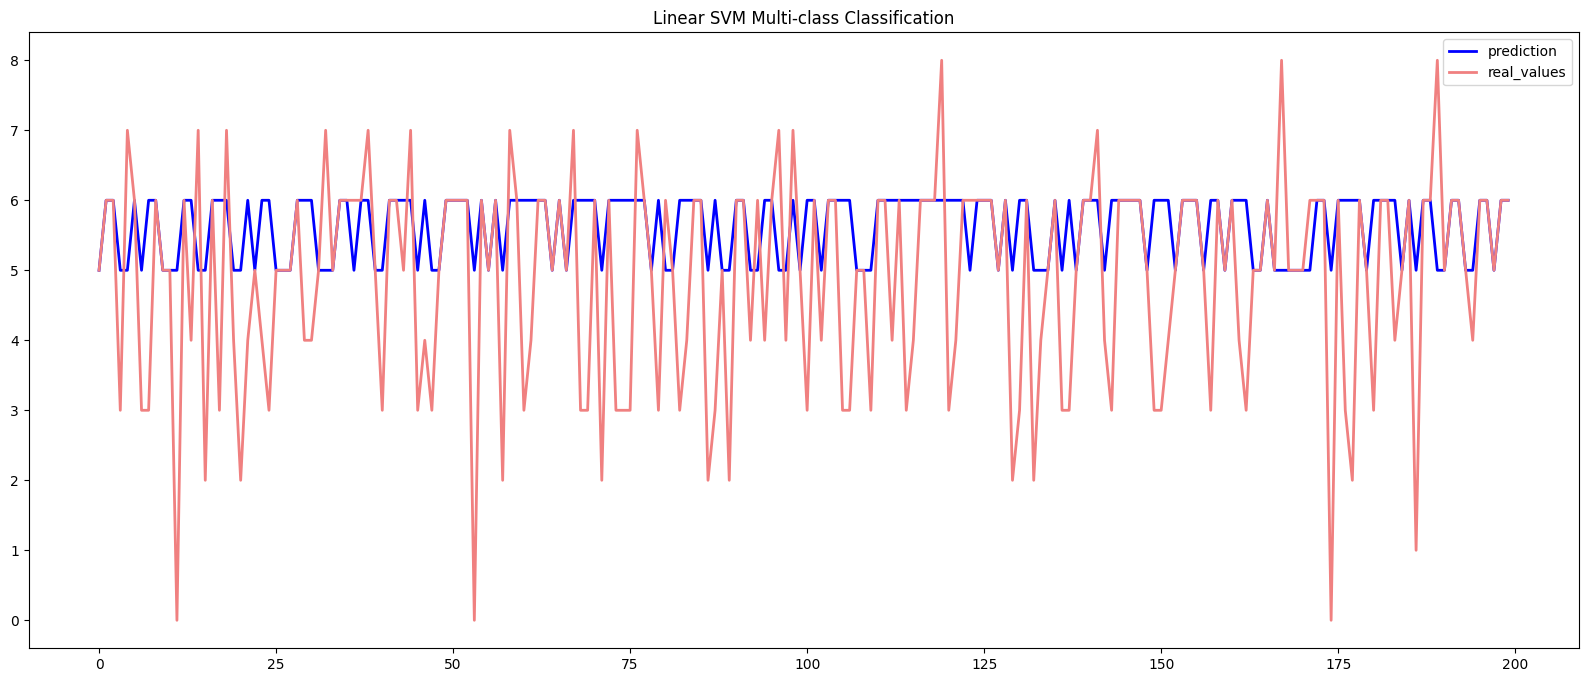

In [220]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("Linear SVM Multi-class Classification")
plt.show()